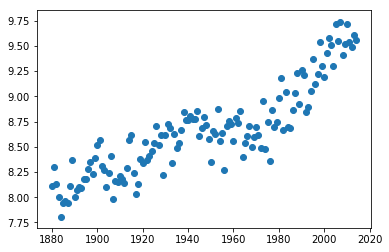

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel('random.xlsx')
array= data.values
tempfix = lambda t : t + 8.68                                                   
vtempfix= np.vectorize(tempfix)                                                 
newcolumn = vtempfix(array[:,5])                                                
reshapenewcolumn = np.reshape(newcolumn, (newcolumn.size, 1))                   
betterdata=np.append(array,reshapenewcolumn,axis=1)                                
np.set_printoptions(edgeitems=4,formatter={'float_kind':'{:0.3f}'.format})      

#print(betterdata) 

def avg(y):                                  
    
    i=range(0,49307)
    j=range(1,365)
    req=[]
    for elm in i:
         if betterdata[elm,1] == y:                         
            req.append(betterdata[elm,:])
    reqarray = np.vstack([req[x] for x in j])          
    
    return float(str(round(np.sum(reqarray[:,6])/365, 3)))  #finding their mean    

def sd(y):                                 

    i=range(0,49307)
    j=range(1,365)
    req=[]
    for elm in i:
         if betterdata[elm,1] == y:
            req.append(betterdata[elm,:])
    reqarray = np.vstack([req[x] for x in j]) 
    
    return float(str(round(365*np.std(reqarray[:,6])/364, 3)))         

#EROOR BAR PLOT

  
p=range(1880,2015)
x1=[]
y1=[]
sdv=[]
for l in p:        
        x1.append(l)
        y1.append(avg(l))                    
        sdv.append(sd(l))                   
    
plt.scatter(x1,y1)
plt.show()        

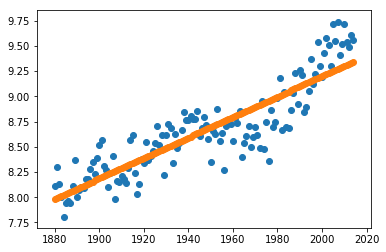

In [88]:
def m(x): 
    a=[]
    for i in range(0,len(x)):
        a.append([])
    for i in range(0,len(x)):
         a[i].append(x[i])
    return(a) 

from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(m(x1),m(y1))
a=model.coef_
b=model.intercept_
plt.scatter(x1,y1)
plt.scatter(x1,a*x1+b)
plt.show()

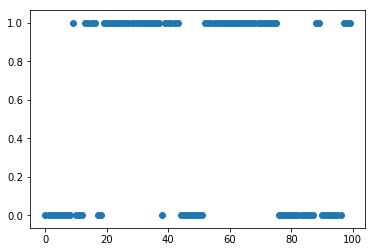

In [95]:
def T(y):                                   
    
    i=range(0,49307)
    j=range(0,729)
    req=[]
    for elm in i:
         if (betterdata[elm,1] == y) or (betterdata[elm,1] == y-1): 
            req.append(betterdata[elm,:])
    reqarray = np.vstack([req[x] for x in j])
    return(reqarray[:,6])
a=T(2014)
b=range(0,729)

c=sum(a)/len(a)
d=[]
for i in range(0,100):
    if(a[i]<c):
        d.append(0)
    elif(a[i]>c):
        d.append(1)
plt.scatter(range(0,100),d) 
plt.show()
#print(d)

In [96]:
from sklearn.linear_model import LogisticRegression
mdl=LinearRegression()
mdl.fit(m(range(0,100)),m(d))
mdl.predict(m(range(100,110)))

array([[0.536],
       [0.535],
       [0.535],
       [0.534],
       [0.533],
       [0.532],
       [0.531],
       [0.530],
       [0.529],
       [0.529]])